In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
dataset = pd.read_csv('/tmp/santander-customer-satisfaction/train.csv')
dataset.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [7]:
dataset.shape

(76020, 371)

In [8]:
x = dataset.drop(labels=['ID','TARGET'], axis=1)

In [9]:
y = dataset['TARGET']

In [10]:
x.shape, y.shape

((76020, 369), (76020,))

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [12]:
x_train.shape, x_test.shape

((60816, 369), (15204, 369))

In [13]:
# Remove constant, quasi constant
# Any column where all the values are the same or only have a couple of values that are different
from sklearn.feature_selection import VarianceThreshold

In [14]:
rm_f = VarianceThreshold(threshold=0.01)
x_train = rm_f.fit_transform(x_train)
x_test = rm_f.transform(x_test)

In [15]:
x_train.shape, x_test.shape

((60816, 266), (15204, 266))

In [16]:
# remove duplicate features
# switch columns and rows around
x_train_t = x_train.T
x_test_t = x_test.T

In [17]:
x_train_t = pd.DataFrame(x_train_t)
x_test_t = pd.DataFrame(x_test_t)

x_train_t.shape, x_test_t.shape

((266, 60816), (266, 15204))

In [18]:
x_train_t.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265    False
Length: 266, dtype: bool

In [19]:
x_train_t.duplicated().sum()

16

In [20]:
duplicated_features = x_train_t.duplicated()
print(duplicated_features)

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265    False
Length: 266, dtype: bool


In [24]:
features_to_keep = [not index for index in duplicated_features]
print(features_to_keep)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, 

In [26]:
x_train = x_train_t[features_to_keep].T
x_test = x_test_t[features_to_keep].T

x_train.shape, x_test.shape

((60816, 250), (15204, 250))

In [28]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train

array([[ 0.03826438, -0.78928712, -0.05257837, ..., -0.01895685,
        -0.01990642,  0.07271318],
       [ 0.03826438, -0.63569505, -0.05257837, ..., -0.01895685,
        -0.01990642,  0.73001879],
       [ 0.03826438,  0.51624549, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.0591358 ],
       ...,
       [ 0.0384475 , -0.78928712, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.27045009],
       [ 0.03826438, -0.25171487, -0.01644412, ..., -0.01895685,
        -0.01990642, -0.28583665],
       [ 0.03826438,  1.66818604, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.23183104]])

In [29]:
x_train.shape, x_test.shape

((60816, 250), (15204, 250))

In [30]:
# reshape to dataset
x_train = x_train.reshape(60816, 250, 1)
x_test = x_test.reshape(15204, 250, 1)

In [31]:
x_train.shape, x_test.shape

((60816, 250, 1), (15204, 250, 1))

In [32]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [37]:
# Building the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(250, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool1D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool1D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool1D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 248, 32)           128       
_________________________________________________________________
batch_normalization (BatchNo (None, 248, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 124, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 124, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 122, 64)           6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 122, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 61, 64)            0

In [40]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00005)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1901/1901 [==============================] - 23s 8ms/step - loss: 0.2261 - accuracy: 0.9524 - val_loss: 0.2142 - val_accuracy: 0.9563
Epoch 2/10
1901/1901 [==============================] - 15s 8ms/step - loss: 0.1750 - accuracy: 0.9601 - val_loss: 0.1973 - val_accuracy: 0.9582
Epoch 3/10
1901/1901 [==============================] - 15s 8ms/step - loss: 0.1671 - accuracy: 0.9607 - val_loss: 0.1904 - val_accuracy: 0.9581
Epoch 4/10
1901/1901 [==============================] - 16s 8ms/step - loss: 0.1641 - accuracy: 0.9609 - val_loss: 0.1796 - val_accuracy: 0.9582
Epoch 5/10
1901/1901 [==============================] - 16s 8ms/step - loss: 0.1613 - accuracy: 0.9608 - val_loss: 0.1787 - val_accuracy: 0.9582
Epoch 6/10
1901/1901 [==============================] - 16s 8ms/step - loss: 0.1591 - accuracy: 0.9609 - val_loss: 0.1729 - val_accuracy: 0.9582
Epoch 7/10
1901/1901 [==============================] - 16s 8ms/step - loss: 0.1553 - accuracy: 0.9609 - val_loss: 0.1693 - val_ac

In [43]:
# model predictions
y_pred = model.predict(x_test)

In [44]:
print(y_pred[0]), print(y_test[0])

[0.00379501]
0


(None, None)

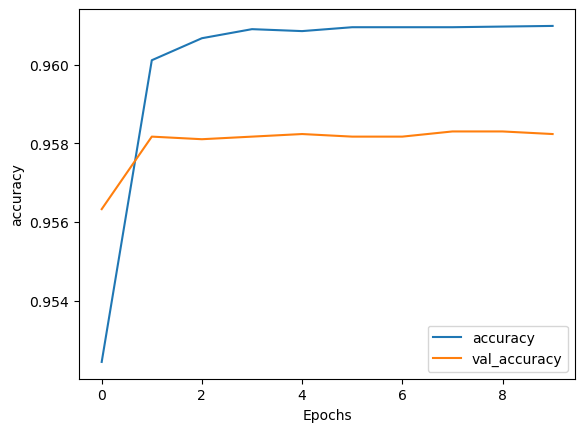

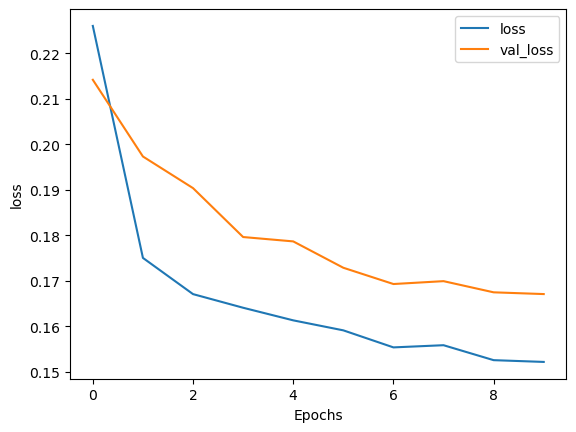

In [45]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")